<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Data Science</h1></center>
<center><h2>Voynich</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
    
</blockquote>

* importer <code>pandas</code> et charger le jeu de données
* afficher les 5 premières lignes    

In [1]:
# Insérer le code ici
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.regexp import RegexpTokenizer


In [2]:
file = open("voynich.txt", "r") 
txt = file.read()
file.close()

mots = txt.split(" ")

In [3]:

tokenizer = RegexpTokenizer("[a-zA-Z]{2,}")
word_list = tokenizer.tokenize(txt.lower())

vectorizer = CountVectorizer()
vectorizer.fit(word_list)

CountVectorizer()

In [4]:
word2idx = vectorizer.vocabulary_
idx2word = dict(zip(word2idx.values(), word2idx.keys()))
vocab_size = len(idx2word)

print(vocab_size)

8059


In [5]:
#Run the program
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.regexp import RegexpTokenizer

def sentenceToData(tokens,WINDOW_SIZE):
    window = np.concatenate((np.arange(-WINDOW_SIZE,0),np.arange(1,WINDOW_SIZE+1)))
    X,Y=([],[])
    for word_index, word in enumerate(tokens) :
        if ((word_index - WINDOW_SIZE >= 0) and (word_index + WINDOW_SIZE <= len(tokens) - 1)) :
            X.append(word2idx[word])
            Y.append([word2idx[tokens[word_index-i]] for i in window])
    return X, Y

WINDOW_SIZE = 5

X, Y = ([], [])

X1, Y1 = sentenceToData(word_list, WINDOW_SIZE//2)
X.extend(X1)
Y.extend(Y1)
    
X = np.array(X).astype(int).reshape([-1,1])
y = np.array(Y).astype(int)
print('Shape of X :', X.shape)
print('Shape of Y :', y.shape)

Shape of X : (37108, 1)
Shape of Y : (37108, 4)


In [6]:
class Word2vec(tf.keras.Model):
    def __init__(self, N_DIM):
        super(Word2vec, self).__init__()
        self.W1 = tf.Variable(tf.random.uniform([vocab_size, N_DIM], -1.0, 1.0))
        self.W2 = tf.Variable(tf.random.uniform([N_DIM, vocab_size], -1.0, 1.0))
    def __call__(self, X, training=True):
        X = tf.one_hot(X, depth=vocab_size, axis=-1)
        X = tf.squeeze(X, axis=1)
        h = tf.linalg.matmul(X, self.W1)
        u = tf.linalg.matmul(h, self.W2)
        return u
    

In [7]:
batch_size = 64
def loss(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.int32)
    y_true = tf.one_hot(y_true, depth=vocab_size)
    return -tf.tensordot(y_pred, tf.reduce_sum(y_true, axis=[1]),2)/batch_size + \
                tf.reduce_sum(4*tf.math.log(tf.reduce_sum(tf.exp(y_pred), axis=[1])))/batch_size

In [15]:
def SaveFitHistory(history, hist_csv_file):
    hist_df = pd.DataFrame(history.history) 
    with open(hist_csv_file+".csv", mode='w') as f:
        hist_df.to_csv(f)
def PlotFitHistory(hist_csv_file):
    df_hist = pd.read_csv(hist_csv_file+".csv") 
    plt.plot(df_hist['loss'], label=hist_csv_file)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.xlim(0,9)
    #plt.ylim(0,1.4)
    plt.title('Courble de descente de gradient par epoch')
    #plt.legend()
    plt.show()
def PlotFitHistories(hist_csv_files):
    fig = plt.figure(figsize=(14,7))
    xmax = 0
    for hist_csv_file in hist_csv_files:
        df_hist = pd.read_csv(hist_csv_file+".csv")
        plt.plot(df_hist['loss'], label=hist_csv_file)
        if len(df_hist) > xmax:
            xmax = len(df_hist)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.xlim(0,xmax)
    plt.title('Courble de descente de gradient par epoch')
    plt.legend()
    plt.show()

In [9]:
word2vec = Word2vec(100)

In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
word2vec.compile(optimizer=optimizer, loss=loss)
history_training = word2vec.fit(X, y, batch_size=batch_size, epochs=20)
word2vec.save_weights('word2vec_lr1e-2_epochs20')
SaveFitHistory(history_training, 'word2vec_lr1e-2_epochs20')

Epoch 1/20
580/580 [==============================] - 14s 24ms/step - loss: 39.0831
Epoch 2/20
580/580 [==============================] - 16s 27ms/step - loss: 28.0009
Epoch 3/20
580/580 [==============================] - 15s 27ms/step - loss: 24.6486
Epoch 4/20
580/580 [==============================] - 18s 31ms/step - loss: 24.0661
Epoch 5/20
580/580 [==============================] - 17s 30ms/step - loss: 24.2421
Epoch 6/20
580/580 [==============================] - 16s 27ms/step - loss: 23.9158
Epoch 7/20
580/580 [==============================] - 15s 27ms/step - loss: 23.4087
Epoch 8/20
580/580 [==============================] - 16s 28ms/step - loss: 23.0894
Epoch 9/20
580/580 [==============================] - 16s 28ms/step - loss: 22.8688
Epoch 10/20
580/580 [==============================] - 16s 27ms/step - loss: 22.7253
Epoch 11/20
580/580 [==============================] - 15s 27ms/step - loss: 22.6194
Epoch 12/20
580/580 [==============================] - 16s 27ms/step - los

,loss
0,39.083111
1,28.000948
2,24.648596
3,24.066116
4,24.242102
5,23.915846
6,23.408743
7,23.089397
8,22.868807
9,22.725330


In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
word2vec.compile(optimizer=optimizer, loss=loss)
history_training = word2vec.fit(X, y, batch_size=batch_size, epochs=20)
word2vec.save_weights('word2vec_lr1e-3_epochs20')
SaveFitHistory(history_training, 'word2vec_lr1e-3_epochs20')

Epoch 1/20
580/580 [==============================] - 16s 28ms/step - loss: 20.6387
Epoch 2/20
580/580 [==============================] - 17s 30ms/step - loss: 19.8387
Epoch 3/20
580/580 [==============================] - 16s 28ms/step - loss: 19.3109
Epoch 4/20
580/580 [==============================] - 15s 25ms/step - loss: 18.9272
Epoch 5/20
580/580 [==============================] - 15s 26ms/step - loss: 18.6361
Epoch 6/20
580/580 [==============================] - 17s 29ms/step - loss: 18.4079
Epoch 7/20
580/580 [==============================] - 17s 29ms/step - loss: 18.2251
Epoch 8/20
580/580 [==============================] - 15s 26ms/step - loss: 18.0766
Epoch 9/20
580/580 [==============================] - 15s 26ms/step - loss: 17.9614
Epoch 10/20
580/580 [==============================] - 16s 28ms/step - loss: 17.8697
Epoch 11/20
580/580 [==============================] - 18s 32ms/step - loss: 17.8015
Epoch 12/20
580/580 [==============================] - 18s 31ms/step - los

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
word2vec.compile(optimizer=optimizer, loss=loss)
history_training = word2vec.fit(X, y, batch_size=batch_size, epochs=200)
word2vec.save_weights('word2vec_lr1e-3_epochs200')
SaveFitHistory(history_training, 'word2vec_lr1e-3_epochs200')

Epoch 1/200
580/580 [==============================] - 15s 27ms/step - loss: 17.6782
Epoch 2/200
580/580 [==============================] - 14s 25ms/step - loss: 17.5750
Epoch 3/200
580/580 [==============================] - 14s 25ms/step - loss: 17.5598
Epoch 4/200
580/580 [==============================] - 15s 25ms/step - loss: 17.5500
Epoch 5/200
580/580 [==============================] - ETA: 0s - loss: 17.53 - 14s 25ms/step - loss: 17.5383
Epoch 6/200
580/580 [==============================] - 15s 26ms/step - loss: 17.5261
Epoch 7/200
580/580 [==============================] - 16s 27ms/step - loss: 17.5165
Epoch 8/200
580/580 [==============================] - 15s 26ms/step - loss: 17.5082
Epoch 9/200
580/580 [==============================] - 16s 27ms/step - loss: 17.4983
Epoch 10/200
580/580 [==============================] - 15s 25ms/step - loss: 17.4907
Epoch 11/200
580/580 [==============================] - 17s 29ms/step - loss: 17.4837
Epoch 12/200
580/580 [=================

580/580 [==============================] - 18s 32ms/step - loss: 17.2850
Epoch 96/200
580/580 [==============================] - 17s 30ms/step - loss: 17.2842
Epoch 97/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2836
Epoch 98/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2824
Epoch 99/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2819
Epoch 100/200
580/580 [==============================] - 16s 28ms/step - loss: 17.2806
Epoch 101/200
580/580 [==============================] - 16s 28ms/step - loss: 17.2804
Epoch 102/200
580/580 [==============================] - 16s 28ms/step - loss: 17.2791
Epoch 103/200
580/580 [==============================] - 16s 28ms/step - loss: 17.2800
Epoch 104/200
580/580 [==============================] - 17s 28ms/step - loss: 17.2786
Epoch 105/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2769
Epoch 106/200
580/580 [==============================] - 16s 

580/580 [==============================] - 16s 27ms/step - loss: 17.2459
Epoch 190/200
580/580 [==============================] - 16s 27ms/step - loss: 17.2454
Epoch 191/200
580/580 [==============================] - 16s 27ms/step - loss: 17.2451
Epoch 192/200
580/580 [==============================] - 16s 27ms/step - loss: 17.2449
Epoch 193/200
580/580 [==============================] - 16s 27ms/step - loss: 17.2453
Epoch 194/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2450
Epoch 195/200
580/580 [==============================] - 17s 30ms/step - loss: 17.2449
Epoch 196/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2448
Epoch 197/200
580/580 [==============================] - 17s 30ms/step - loss: 17.2441
Epoch 198/200
580/580 [==============================] - 17s 29ms/step - loss: 17.2443
Epoch 199/200
580/580 [==============================] - 16s 28ms/step - loss: 17.2437
Epoch 200/200
580/580 [==============================] - 

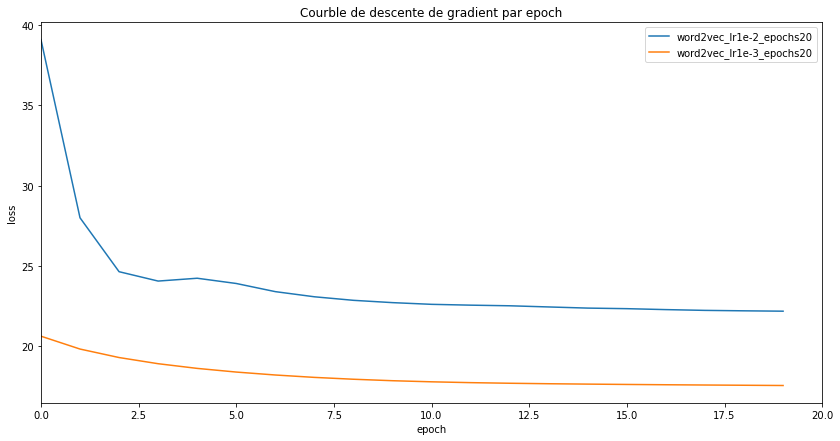

In [19]:
PlotFitHistories(['word2vec_lr1e-2_epochs20', 'word2vec_lr1e-3_epochs20'])

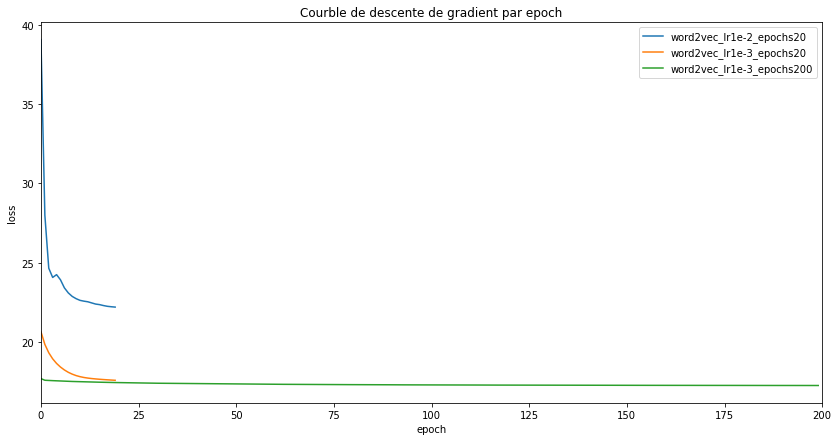

In [20]:
PlotFitHistories(['word2vec_lr1e-2_epochs20', 'word2vec_lr1e-3_epochs20', 'word2vec_lr1e-3_epochs200'])

Extraire la représentation matricielle 

In [27]:
from sklearn.preprocessing import Normalizer
vectors = word2vec.W1.numpy()
normalizer = Normalizer()
vectors = normalizer.fit_transform(vectors, 'l2')

In [28]:
## Run the program

def dot_product(vec1, vec2):
    return np.sum((vec1*vec2))

def cosine_similarity(vec1, vec2):
    return dot_product(vec1, vec2)/np.sqrt(dot_product(vec1, vec1)*dot_product(vec2, vec2))

def find_closest(word_index, vectors, number_closest):
    list1=[]
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def compare(index_word1,index_word2,index_word3,vectors,number_closest):
    list1=[]
    query_vector = vectors[index_word1]-vectors[index_word2]+vectors[index_word3]
    normalizer = Normalizer()
    query_vector =  normalizer.fit_transform([query_vector], 'l2')
    query_vector= query_vector[0]
    for index, vector in enumerate(vectors):
        if not np.array_equal(vector, query_vector):
            dist = cosine_similarity(vector, query_vector)
            list1.append([dist,index])
    return np.asarray(sorted(list1,reverse=True)[:number_closest])

def print_closest(word, number=10):
    index_closest_words = find_closest(word2idx[word], vectors, number)
    for index_word in index_closest_words :
        print(idx2word[index_word[1]]," -- ",index_word[0])

In [ ]:
#for mot in ["king", "france", "computer", "virus", "glass"]:
#    print("=== ", mot, " ===")
#    print_closest(mot)
#    print("\n")

In [29]:
print_closest('daiin')

otod  --  0.4157867729663849
tchoep  --  0.41243892908096313
kchydy  --  0.37402254343032837
tydlo  --  0.3656289279460907
dls  --  0.35711389780044556
lochey  --  0.35703206062316895
cphchar  --  0.3523392379283905
ypchol  --  0.3508716821670532
ykchon  --  0.3487931191921234
ykeeodain  --  0.3454188406467438


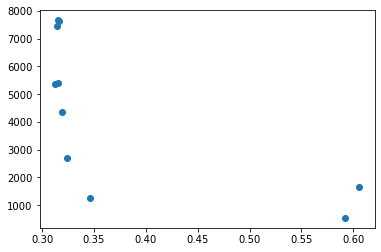

In [42]:
points = compare(word2idx['daiin'],word2idx['ol'],word2idx['chedy'],vectors,10)
plt.scatter([i[0] for i in points], [i[1] for i in points]);

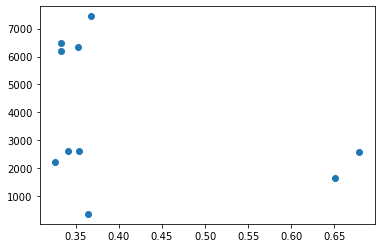

In [43]:
points = compare(word2idx['daiin'],word2idx['otod'],word2idx['kchydy'],vectors,10)
plt.scatter([i[0] for i in points], [i[1] for i in points]);

In [ ]:
## Run the program.
from sklearn.decomposition import PCA

pairs = [('woman', 'man'),
('sister', 'brother'),
('daughter', 'son'),
('mother', 'father'),
('girl', 'boy'),
('queen', 'king')]

n=np.shape(pairs)[0]
difference_matrix = np.array([vectors[word2idx[a[0]]]-vectors[word2idx[a[1]]] for a in pairs])

pca = PCA(n_components=n)
pca.fit(difference_matrix)

words=[vectors[word2idx[word]] for word in np.concatenatepairs)]

coord = pca.fit_transform(words)
normalizer = Normalizer()
coord =  normalizer.fit_transform(coord, 'l2')
print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(figsize=(12,12))

for i in range(n*2):
    plt.annotate(np.concatenate(pairs)[i],(coord[i,0],coord[i,1]))

for i in range (n):
    plt.plot([coord[2*i,0],coord[2*i+1,0]],[coord[2*i,1],coord[2*i+1,1]])

plt.show()

Propriétés arithmétiques 

In [24]:
import gensim.downloader as api
print(api.info())

{'corpora': {'semeval-2016-2017-task3-subtaskBC': {'num_records': -1, 'record_format': 'dict', 'file_size': 6344358, 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/semeval-2016-2017-task3-subtaskB-eng/__init__.py', 'license': 'All files released for the task are free for general research use', 'fields': {'2016-train': ['...'], '2016-dev': ['...'], '2017-test': ['...'], '2016-test': ['...']}, 'description': 'SemEval 2016 / 2017 Task 3 Subtask B and C datasets contain train+development (317 original questions, 3,169 related questions, and 31,690 comments), and test datasets in English. The description of the tasks and the collected data is given in sections 3 and 4.1 of the task paper http://alt.qcri.org/semeval2016/task3/data/uploads/semeval2016-task3-report.pdf linked in section “Papers” of https://github.com/RaRe-Technologies/gensim-data/issues/18.', 'checksum': '701ea67acd82e75f95e1d8e62fb0ad29', 'file_name': 'semeval-2016-2017-task3-subtaskBC.gz',

In [25]:
model = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


In [ ]:
model.most_similar("king")

In [ ]:
model.most_similar(positive=['King', 'WomanKing'], )

In [22]:
model.corpus_count

AttributeError: 'Word2vec' object has no attribute 'corpus_count'